In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings(action = 'ignore')

In [157]:
trn = pd.read_csv('data/train.csv', index_col = 0)
tst = pd.read_csv('data/test.csv', index_col = 0)

trn2 = trn.drop('credit', axis = 1)

df = pd.concat([trn2,tst])

In [245]:
## 나이 변환
def days_to_age(x):
    return (x*-1)/365

## 신용카드 발급월 양수로 전환
def begin_plus_month(x):
    return (x*-1)

## 신용카드 발급월 연도로 전환
def begin_plus_year(x):
    return (x)//12

## 업무 시작일 변환
def plus(x):
    if x<0:
        return x*(-1)
    else:
        return 0

## 변수 생성

In [246]:
trn.begin_month_plus

index
0         6.0
1         5.0
2        22.0
3        37.0
4        26.0
         ... 
26452     2.0
26453    47.0
26454    25.0
26455    59.0
26456     9.0
Name: begin_month_plus, Length: 26457, dtype: float64

In [248]:
## 나이로 변환
trn['birth'] = days_to_age(trn.DAYS_BIRTH).round()

## 나이 구간화
trn['age'] = pd.cut(trn.birth, bins = [0,10,20,30,40,50,60,70], labels = ['10','20','30','40','50','60','70'])
trn['age']

## 신용카드 발급월 변수의 변환
trn['begin_month_plus'] = begin_plus_month(trn.begin_month).round()

## 신용카드 발급월 연차로 변환
trn['begin_month_year'] = begin_plus_year(trn.begin_month_plus)

## 신용카드 발급월 구간화
trn['begin_month_bin'] = pd.cut(trn.begin_month_plus, bins = [-10,10,20,30,40,50,60,70], labels = ['10','20','30','40','50','60','70'])
trn['begin_month_bin'].value_counts()

## 업무시작일 양수로 변환
trn['employed_plus'] = trn.DAYS_EMPLOYED.map(plus)
trn['employed_plus']

## 0과 1로 범주화 (업무를 하는 사람과 아닌 사람)
trn['employed_bin'] = trn.employed_plus.map(lambda x : 0 if x==0 else 1)

## 업무 연차로 변환
trn['employed_bin2'] = trn['employed_plus']//365
trn['employed_bin2']

index
0        12
1         4
2        12
3         5
4         5
         ..
26452     5
26453     6
26454     5
26455     0
26456     2
Name: employed_bin2, Length: 26457, dtype: int64

In [249]:
## credit에 따른 분리
trn_0 = trn[trn.credit == 0].reset_index(drop = True)
trn_1 = trn[trn.credit == 1].reset_index(drop = True)
trn_2 = trn[trn.credit == 2].reset_index(drop = True)

In [162]:
print(trn.shape)
print(tst.shape)
print(df.shape)

(26457, 27)
(10000, 18)
(36457, 18)


In [163]:
## 성별 : 여성을 0으로 남성을 1로 변환
df['gender'] = df['gender'].map({'F': '0', 'M': '1'})
trn['gender'] = trn['gender'].map({'F': '0', 'M': '1'})

## 자동차 소유 여부 : No 0으로 yes를 1로 변환
df['car'] = df['car'].map({'N': '0', 'Y': '1'})
trn['car'] = trn['car'].map({'N': '0', 'Y': '1'})

## 부동산 소유 여부 : No 0으로 yes를 1로 변환
df['reality'] = df['reality'].map({'N': '0', 'Y': '1'})
trn['reality'] = trn['reality'].map({'N': '0', 'Y': '1'})

## 종속변수 변환 : 범주형으로 변환
trn.credit = trn.credit.astype('object')

In [164]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            26457 non-null  object  
 1   car               26457 non-null  object  
 2   reality           26457 non-null  object  
 3   child_num         26457 non-null  int64   
 4   income_total      26457 non-null  float64 
 5   income_type       26457 non-null  object  
 6   edu_type          26457 non-null  object  
 7   family_type       26457 non-null  object  
 8   house_type        26457 non-null  object  
 9   DAYS_BIRTH        26457 non-null  int64   
 10  DAYS_EMPLOYED     26457 non-null  int64   
 11  FLAG_MOBIL        26457 non-null  int64   
 12  work_phone        26457 non-null  int64   
 13  phone             26457 non-null  int64   
 14  email             26457 non-null  int64   
 15  occyp_type        18286 non-null  object  
 16  family_size       2645

## 종속변수 credit 확인

In [165]:
## credit에 따른 분리
trn_0 = trn[trn.credit == 0].reset_index(drop = True)
trn_1 = trn[trn.credit == 1].reset_index(drop = True)
trn_2 = trn[trn.credit == 2].reset_index(drop = True)

In [166]:
# Categorical 그래프 함수 정의
def cat_plot(column):

    f, ax = plt.subplots(1, 3, figsize=(16, 6))


    sns.countplot(x = column,
                data = trn_0,
                ax = ax[0],
                order = trn_0[column].value_counts().index)
    ax[0].tick_params(labelsize=12)
    ax[0].set_title('credit = 0')
    ax[0].set_ylabel('count')
    ax[0].tick_params(rotation=50)


    sns.countplot(x = column,
                data = trn_1,
                ax = ax[1],
                order = trn_1[column].value_counts().index)
    ax[1].tick_params(labelsize=12)
    ax[1].set_title('credit = 1')
    ax[1].set_ylabel('count')
    ax[1].tick_params(rotation=50)

    sns.countplot(x = column,
                data = trn_2,
                ax = ax[2],
                order = trn_2[column].value_counts().index)
    ax[2].tick_params(labelsize=12)
    ax[2].set_title('credit = 2')
    ax[2].set_ylabel('count')
    ax[2].tick_params(rotation=50)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

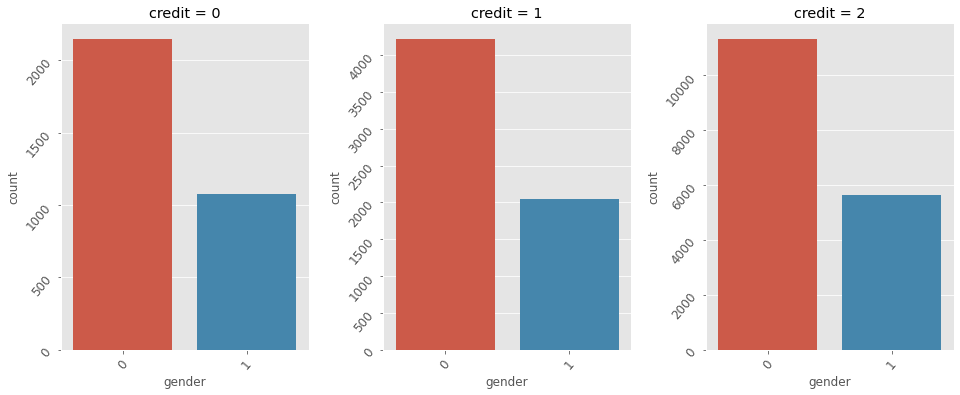

In [167]:
cat_plot('gender')

Text(0.5, 1.0, 'y = 2')

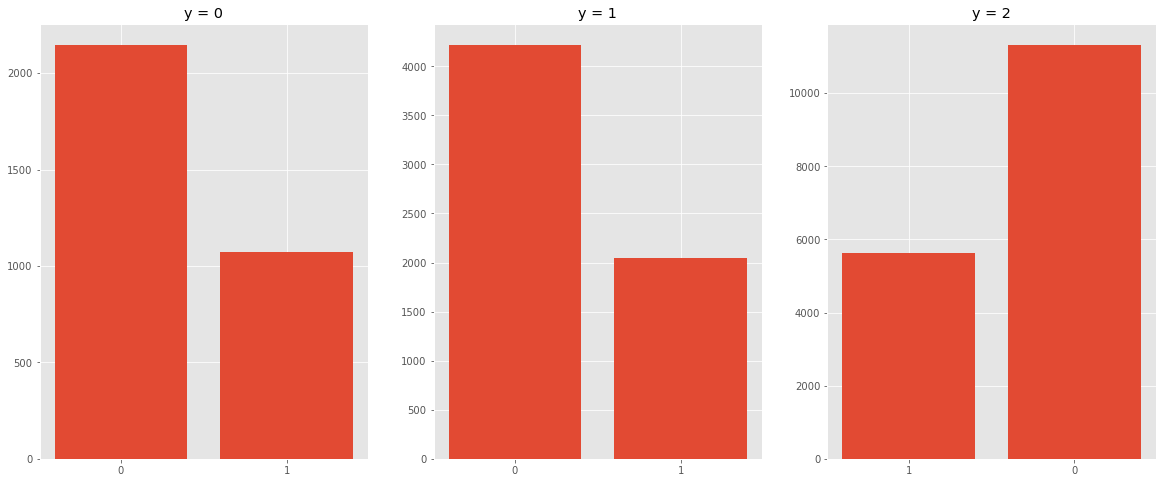

In [168]:
t_0_g = Counter(trn_0.gender)
t_1_g = Counter(trn_1.gender)
t_2_g = Counter(trn_2.gender)


fig=plt.figure(figsize=(20,8))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

ax1.bar(t_0_g.keys(), t_0_g.values())
ax2.bar(t_1_g.keys(), t_1_g.values())
ax3.bar(t_2_g.keys(), t_2_g.values())

ax1.set_title('y = 0')
ax2.set_title('y = 1')
ax3.set_title('y = 2')

Text(0, 0.5, 'birth')

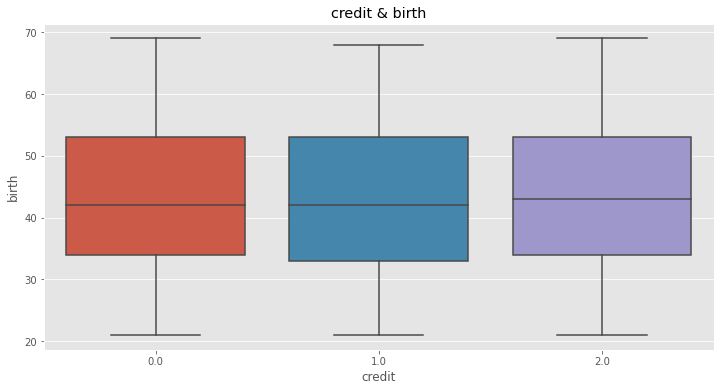

In [169]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'credit',
           y = 'birth',
           data = trn)

plt.title('credit & birth')
plt.ylabel("birth")

(array([  6.,  31., 173., 157., 336., 382., 630., 794., 775., 763., 615.,
        726., 737., 831., 732., 683., 812., 720., 889., 817., 777., 761.,
        662., 724.,   0., 651., 607., 639., 608., 643., 539., 631., 616.,
        538., 564., 569., 533., 584., 546., 575., 586., 525., 424., 396.,
        435., 313., 182., 156.,  58.,   6.]),
 array([21.  , 21.96, 22.92, 23.88, 24.84, 25.8 , 26.76, 27.72, 28.68,
        29.64, 30.6 , 31.56, 32.52, 33.48, 34.44, 35.4 , 36.36, 37.32,
        38.28, 39.24, 40.2 , 41.16, 42.12, 43.08, 44.04, 45.  , 45.96,
        46.92, 47.88, 48.84, 49.8 , 50.76, 51.72, 52.68, 53.64, 54.6 ,
        55.56, 56.52, 57.48, 58.44, 59.4 , 60.36, 61.32, 62.28, 63.24,
        64.2 , 65.16, 66.12, 67.08, 68.04, 69.  ]),
 <BarContainer object of 50 artists>)

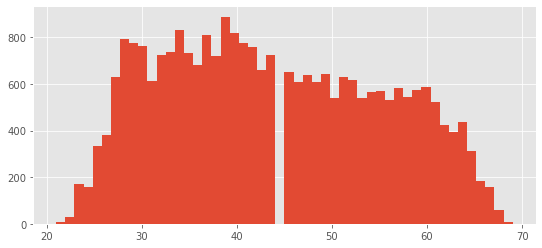

In [170]:
plt.figure(figsize = (9,4))
plt.hist(trn.birth, bins = 50)

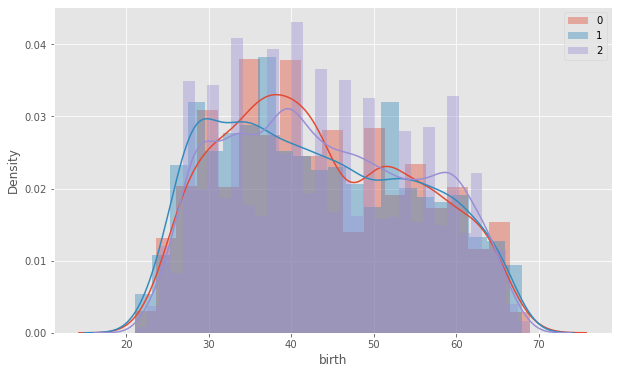

In [171]:
plt.figure(figsize = (10,6))
sns.distplot(trn_0['birth'], label = '0')
sns.distplot(trn_1['birth'], label = '1')
sns.distplot(trn_2['birth'], label = '2')
plt.legend()

- 나이만으로는 잘 구분이 안 된다.

## 신용카드 발급월 확인

Text(0, 0.5, 'begin_month')

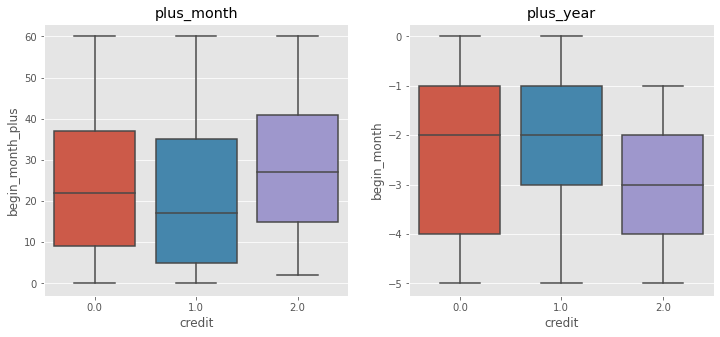

In [172]:
fig,axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x = 'credit',
           y = 'begin_month_plus',
            ax = axes[0],
           data = trn)
axes[0].set_title('plus_month')

sns.boxplot(x = 'credit',
           y = 'begin_month_year',
            ax = axes[1],
            data = trn)
axes[1].set_title('plus_year')

plt.ylabel("begin_month")

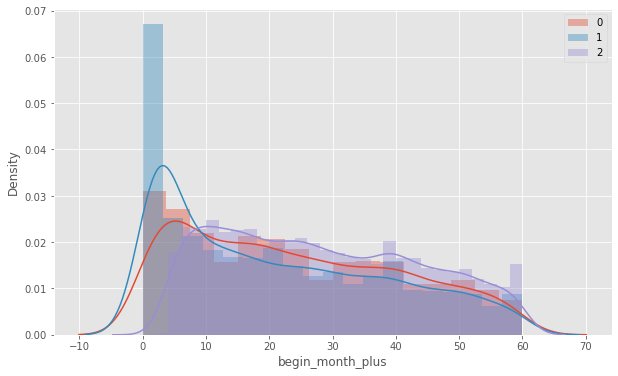

In [173]:
plt.figure(figsize = (10,6))
sns.distplot(trn_0['begin_month_plus'], label = '0')
sns.distplot(trn_1['begin_month_plus'], label = '1')
sns.distplot(trn_2['begin_month_plus'], label = '2')
plt.legend()

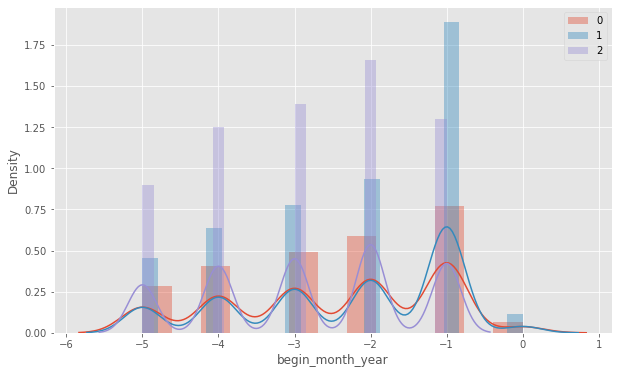

In [174]:
plt.figure(figsize = (10,6))
sns.distplot(trn_0['begin_month_year'], label = '0')
sns.distplot(trn_1['begin_month_year'], label = '1')
sns.distplot(trn_2['begin_month_year'], label = '2')
plt.legend()

- 신용카드 발급월 및 연차가 낮을수록 신용도가 1인게 많음

<AxesSubplot:>

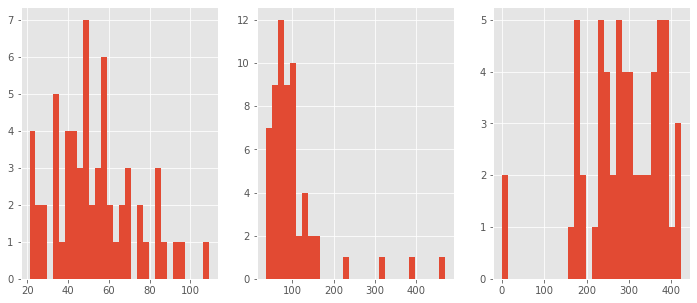

In [175]:
fig,axes = plt.subplots(1, 3, figsize=(12, 5))
trn_0.groupby('begin_month_plus').count()['credit'].hist(bins = 30, ax = axes[0])
trn_1.groupby('begin_month_plus').count()['credit'].hist(bins = 30, ax = axes[1])
trn_2.groupby('begin_month_plus').count()['credit'].hist(bins = 30, ax = axes[2])

- 신용카드 발급월을 다르게 바꿔봐도 어려워보임

<AxesSubplot:xlabel='begin_month_bin', ylabel='count'>

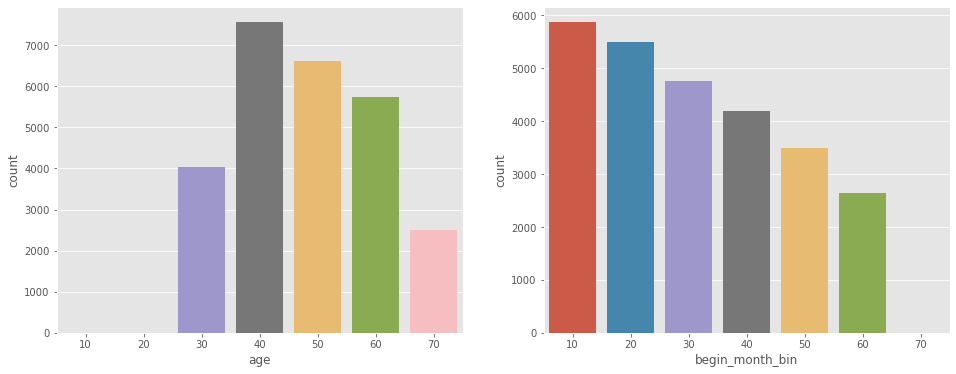

In [176]:
f, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(x='age', 
              data = trn,
             ax = ax[0])
sns.countplot(x='begin_month_bin', 
              data = trn,
             ax = ax[1])

<AxesSubplot:xlabel='begin_month_bin', ylabel='count'>

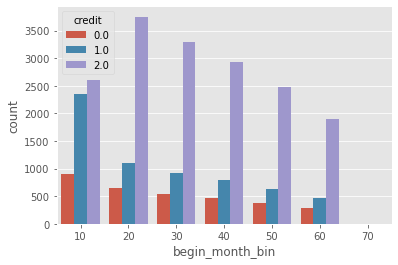

In [177]:
sns.countplot(x='begin_month_bin', 
              data = trn,
             hue = 'credit')

- 10대와 20대가 없는데 직업에 학생이 존재
- 신용카드 발급월이 적을수록 신용도가 가장 많이 섞여있음

## 신용카드 발급 조건과 신용도에 영향을 미치는 요인
- 신용등급이나 소득 등의 조건으로 인해 대학생이나 주부의 경우에는 발급이 어려울수 있습니다.
    - 발급이 가능하다면 부자일까
- 소득 조건을 판별하는 경우 소득의 종류와 연소득을 기준 (신용카드 발급에 영향)



In [178]:
tab = pd.crosstab(trn['age'], trn['begin_month_bin'],margins=True)#.sort_values('All',ascending=False)
tab

begin_month_bin,10,20,30,40,50,60,All
age,,,,,,,
30,1145,899,779,575,409,240,4047
40,1586,1505,1470,1236,1049,716,7562
50,1354,1354,1140,1053,918,792,6611
60,1243,1216,967,921,772,623,5742
70,543,522,407,398,347,278,2495
All,5871,5496,4763,4183,3495,2649,26457


In [179]:
trn.groupby(['age','begin_month_bin','credit'])['credit'].count()

age  begin_month_bin  credit
10   10               0.0         0
                      1.0         0
                      2.0         0
     20               0.0         0
                      1.0         0
                               ... 
70   60               1.0        55
                      2.0       193
     70               0.0         0
                      1.0         0
                      2.0         0
Name: credit, Length: 147, dtype: int64

In [180]:
g_trn_0 = trn_0.groupby(['age','begin_month_bin'])['credit'].count().to_frame()
g_trn_1 = trn_1.groupby(['age','begin_month_bin'])['credit'].count().to_frame()
g_trn_2 = trn_2.groupby(['age','begin_month_bin'])['credit'].count().to_frame()
#g_df[43:].plot(kind = 'bar',x = 'plus_month_bin', figsize = (16,6), rot=45)

<AxesSubplot:xlabel='age,begin_month_bin'>

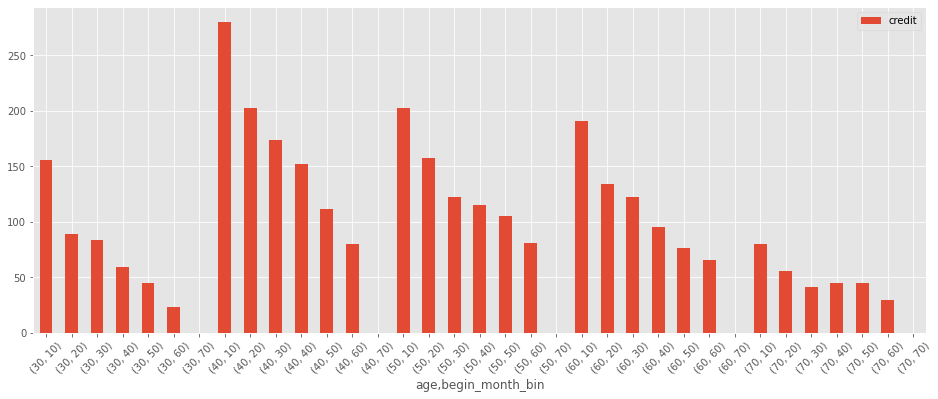

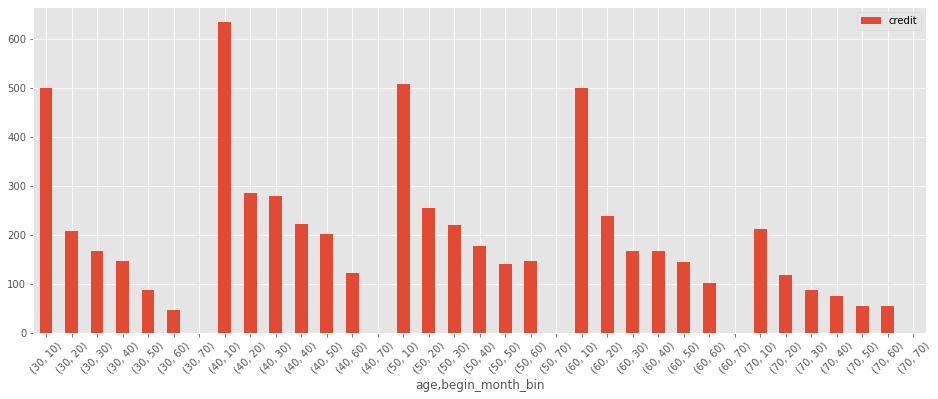

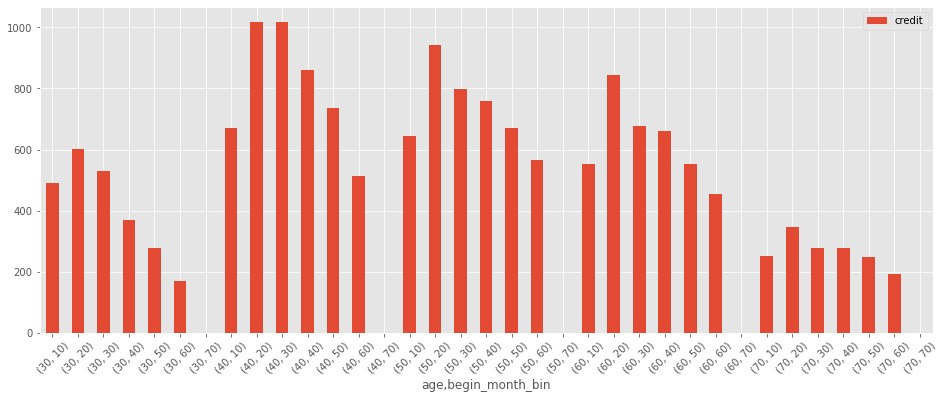

In [181]:
g_trn_0[14:].plot(kind = 'bar', figsize = (16,6), rot=45)
g_trn_1[14:].plot(kind = 'bar', figsize = (16,6), rot=45)
g_trn_2[14:].plot(kind = 'bar', figsize = (16,6), rot=45)

<AxesSubplot:xlabel='age,begin_month_bin'>

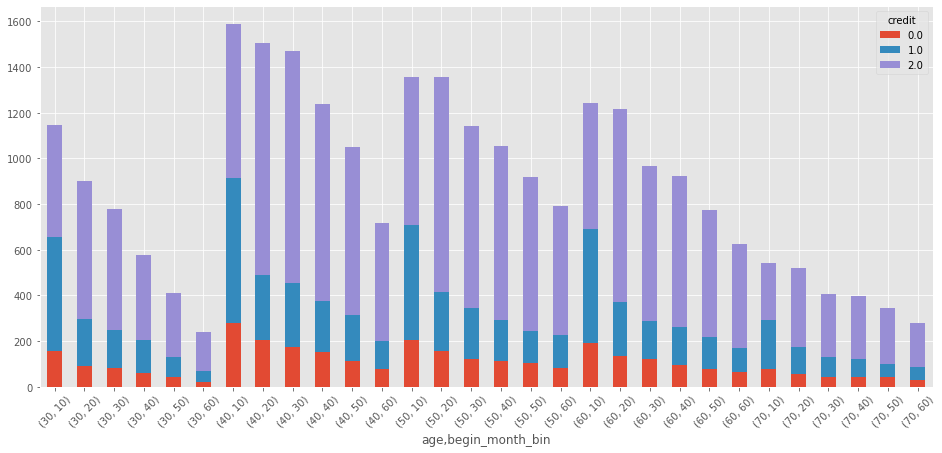

In [182]:
tab = pd.crosstab(index = [trn['age'], trn['begin_month_bin']], columns = trn.credit)
tab.plot(kind='bar', stacked=True, figsize = (16,7), rot=45)

<AxesSubplot:>

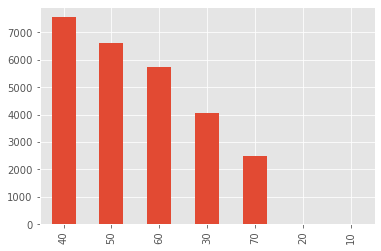

In [183]:
trn.age.value_counts().plot(kind = 'bar')

- 신용도는 나이, 신용카드 발급월과는 큰 관련이 없는 듯하다

## 업무 시작일

<AxesSubplot:xlabel='employed_plus', ylabel='Density'>

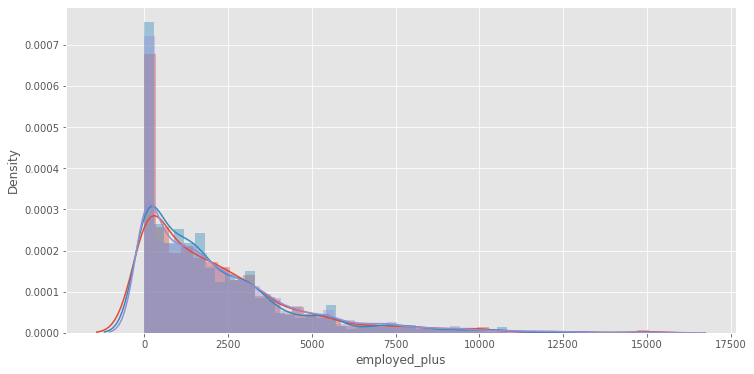

In [184]:
plt.figure(figsize = (12,6))
sns.distplot(trn_0['employed_plus'], label = 'credit = 0')
sns.distplot(trn_1['employed_plus'], label = 'credit = 1')
sns.distplot(trn_2['employed_plus'], label = 'credit = 2')

<AxesSubplot:xlabel='employed_bin', ylabel='count'>

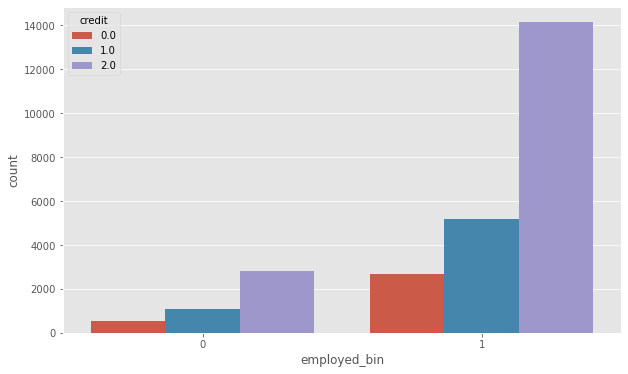

In [185]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'employed_bin',
              hue = 'credit',
             data = trn)

<AxesSubplot:xlabel='employed_bin,employed_plus'>

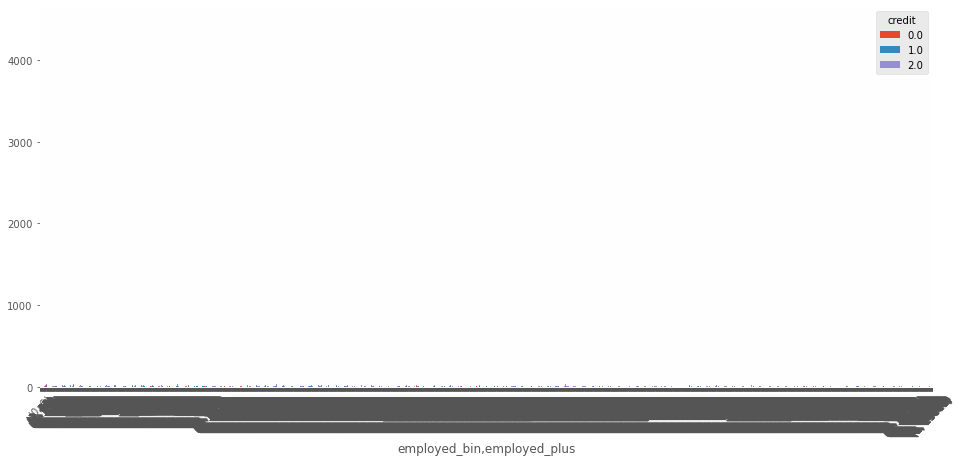

In [320]:
## 직장 유무와 신용카드 발급월과 credit
tab = pd.crosstab(index = [trn['employed_bin'], trn['employed_plus']], columns = trn.credit)
tab.plot(kind='bar', stacked=True, figsize = (16,7), rot=45)

<AxesSubplot:xlabel='employed_bin,employed_bin2'>

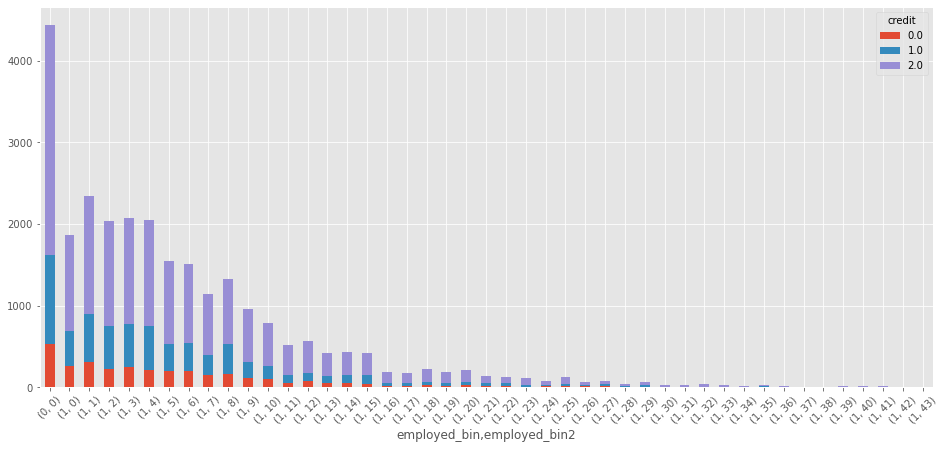

In [187]:
## 직장 유무와 신용카드 발급 연차과 credit
tab = pd.crosstab(index = [trn['employed_bin'], trn['employed_bin2']], columns = trn.credit)
tab.plot(kind='bar', stacked=True, figsize = (16,7), rot=45)

<AxesSubplot:xlabel='employed_bin,begin_month_bin,age'>

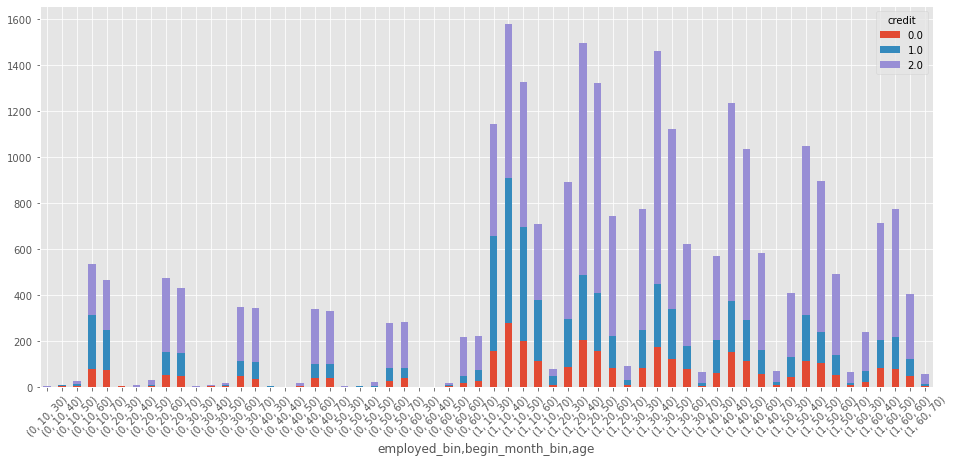

In [188]:
## 나이, 신용카드 발급월, 직장 유무와 credit
tab = pd.crosstab(index = [trn['employed_bin'], trn['begin_month_bin'], trn['age']], columns = trn.credit)
tab.plot(kind='bar', stacked=True, figsize = (16,7), rot=45)

<AxesSubplot:xlabel='employed_bin2', ylabel='count'>

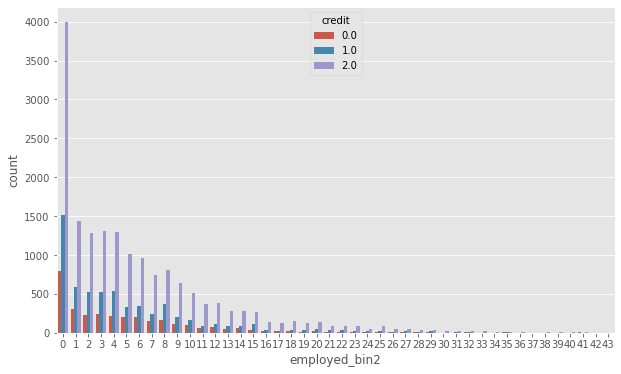

In [189]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'employed_bin2',
              hue = 'credit',
             data = trn)

# 2차 파생 변수 생성

In [190]:
## 태어날과 업무시작 날 사이에 관계가 있지 않을까 확인
trn['birth_employed'] = trn.DAYS_BIRTH*(-1) - trn['employed_plus']
trn['birth_employed']

index
0         9190
1         9840
2        14653
3        12996
4        12932
         ...  
26452    10095
26453    12816
26454     8067
26455    10038
26456    18556
Name: birth_employed, Length: 26457, dtype: int64

<AxesSubplot:xlabel='birth', ylabel='Density'>

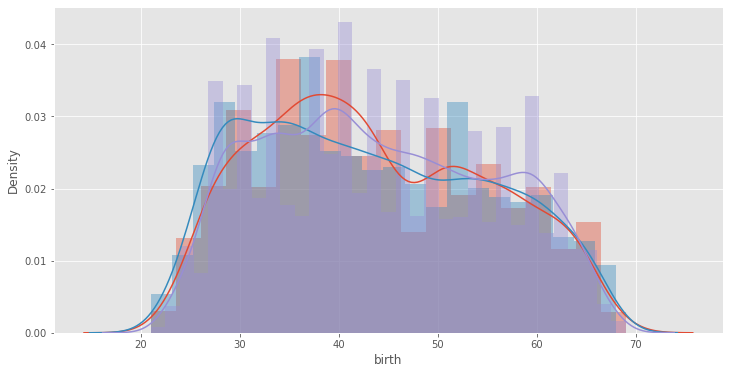

In [313]:
plt.figure(figsize = (12,6))
sns.distplot(trn.loc[trn['credit']==0,'birth'], label='credit=0', hist=True)
sns.distplot(trn.loc[trn['credit']==1,'birth'], label='credit=1', hist=True)
sns.distplot(trn.loc[trn['credit']==2,'birth'], label='credit=2', hist=True)

<AxesSubplot:xlabel='birth_employed', ylabel='Density'>

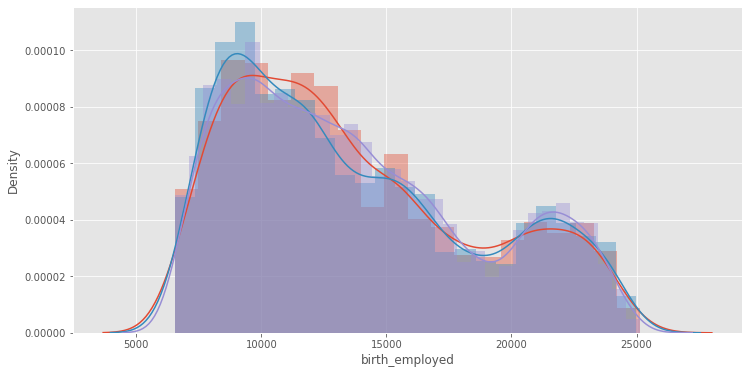

In [191]:
## birth 하나만 있는게 더 구분을 잘함
plt.figure(figsize = (12,6))
sns.distplot(trn.loc[trn['credit']==0,'birth_employed'], label='credit=0', hist=True)
sns.distplot(trn.loc[trn['credit']==1,'birth_employed'], label='credit=1', hist=True)
sns.distplot(trn.loc[trn['credit']==2,'birth_employed'], label='credit=2', hist=True)

In [192]:
## 태어난 날과 신용카드 발급일 
trn['birth_begin_day'] = trn.DAYS_BIRTH*(-1) - trn['begin_month_plus']*12
trn['birth_begin_day']

index
0        13827.0
1        11320.0
2        18823.0
3        14644.0
4        14725.0
          ...   
26452    12055.0
26453    14727.0
26454     9782.0
26455     9437.0
26456    19461.0
Name: birth_begin_day, Length: 26457, dtype: float64

<AxesSubplot:xlabel='begin_month_plus', ylabel='Density'>

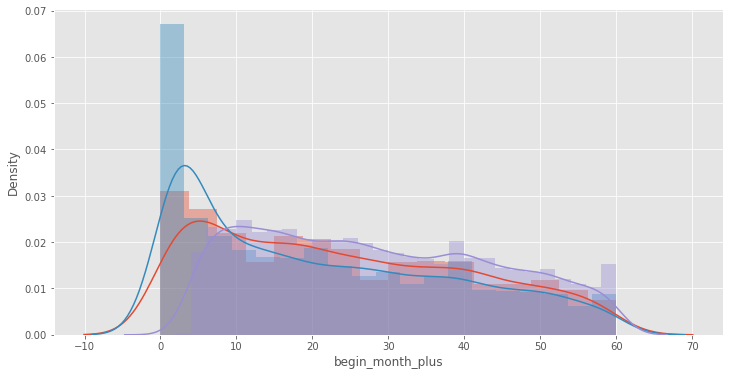

In [314]:
plt.figure(figsize = (12,6))
sns.distplot(trn.loc[trn['credit']==0,'begin_month_plus'], label='credit=0', hist=True)
sns.distplot(trn.loc[trn['credit']==1,'begin_month_plus'], label='credit=1', hist=True)
sns.distplot(trn.loc[trn['credit']==2,'begin_month_plus'], label='credit=2', hist=True)

<AxesSubplot:xlabel='birth_begin_day', ylabel='Density'>

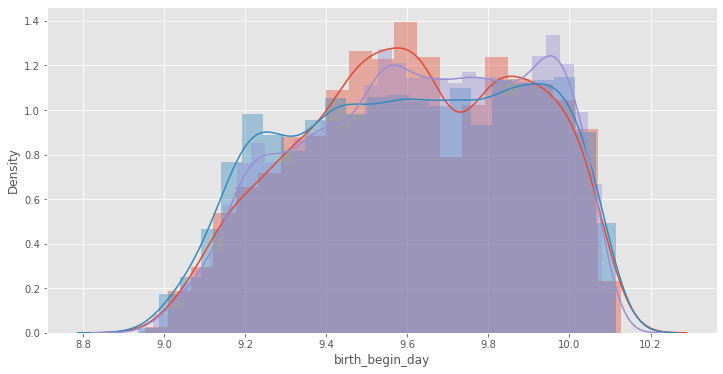

In [317]:
## 큰 의미는 없어 보임
plt.figure(figsize = (12,6))
sns.distplot(trn.loc[trn['credit']==0,'birth_begin_day'].apply(np.log), label='credit=0', hist=True)
sns.distplot(trn.loc[trn['credit']==1,'birth_begin_day'].apply(np.log), label='credit=1', hist=True)
sns.distplot(trn.loc[trn['credit']==2,'birth_begin_day'].apply(np.log), label='credit=2', hist=True)

In [194]:
## 업무 시작일과 신용카드 발급일
trn['employed_begin_month'] = trn['employed_plus'] - trn['begin_month_plus']*12
trn['employed_begin_month']

index
0        4637.0
1        1480.0
2        4170.0
3        1648.0
4        1793.0
          ...  
26452    1960.0
26453    1911.0
26454    1715.0
26455    -601.0
26456     905.0
Name: employed_begin_month, Length: 26457, dtype: float64

<AxesSubplot:xlabel='employed_begin_month', ylabel='Density'>

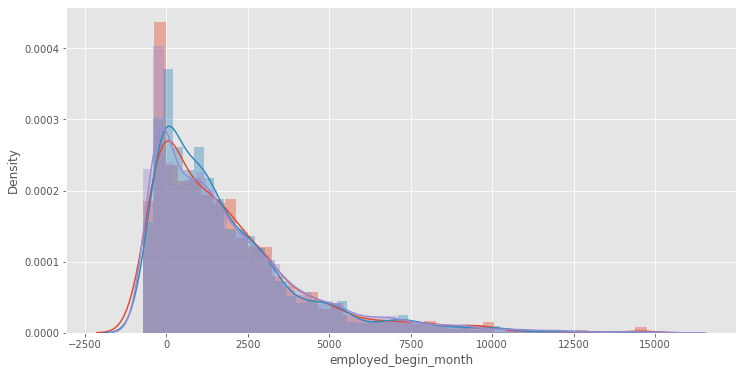

In [195]:
plt.figure(figsize = (12,6))
sns.distplot(trn.loc[trn['credit']==0,'employed_begin_month'], label='credit=0', hist=True)
sns.distplot(trn.loc[trn['credit']==1,'employed_begin_month'], label='credit=1', hist=True)
sns.distplot(trn.loc[trn['credit']==2,'employed_begin_month'], label='credit=2', hist=True)

# 교육 수준 변수 순서형으로 변환

In [196]:
trn['edu_type'] = trn.edu_type.map({'Academic degree' : 0, 
                  "Lower secondary" : 1, 
                  'Incomplete higher' : 2,
                 'Secondary / secondary special':3,
                 'Higher education':4})

<AxesSubplot:xlabel='edu_type'>

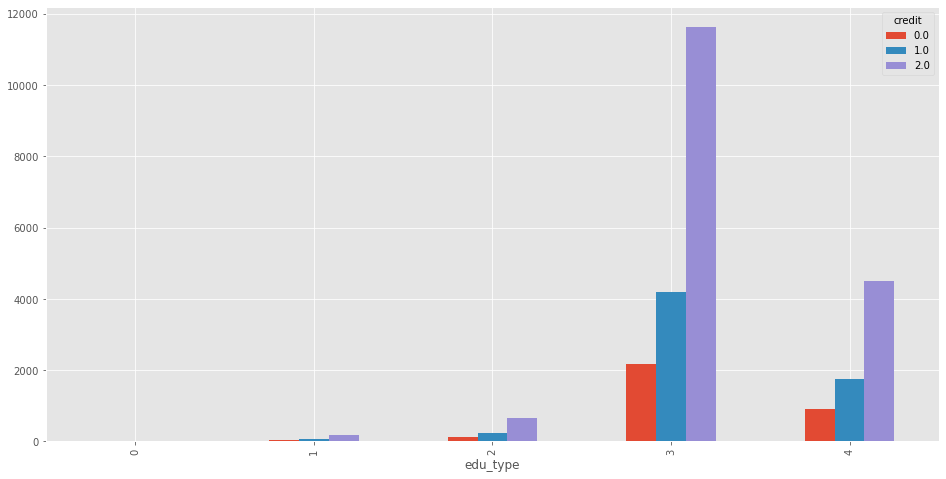

In [197]:
pd.crosstab(index = trn.edu_type, columns = trn.credit, margins = False).plot(kind = 'bar', figsize = (16,8))

<AxesSubplot:xlabel='edu_type,employed_bin2'>

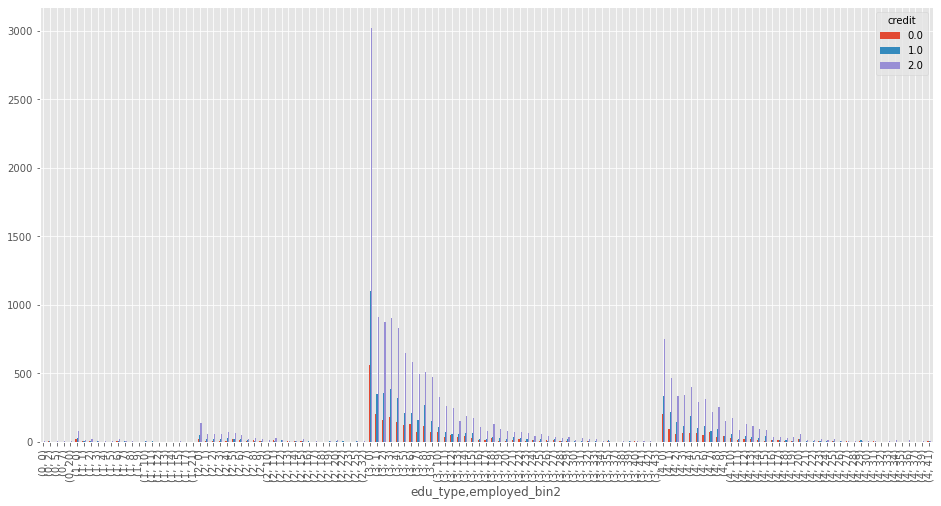

In [198]:
pd.crosstab(index = [trn.edu_type, trn.employed_bin2], columns = trn.credit, margins = False).plot(kind = 'bar', figsize = (16,8))

<AxesSubplot:xlabel='edu_type,employed_bin'>

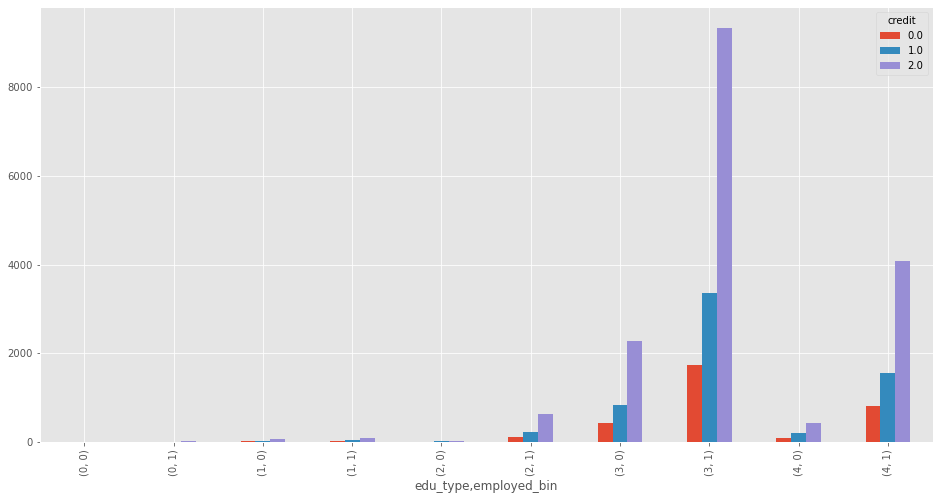

In [199]:
pd.crosstab(index = [trn.edu_type, trn.employed_bin], columns = trn.credit, margins = False).plot(kind = 'bar', figsize = (16,8))

# 디테일한 직군별 확인

In [200]:
trn.occyp_type.map(lambda x: 'None' if x == np.nan else x)

index
0                   NaN
1              Laborers
2              Managers
3           Sales staff
4              Managers
              ...      
26452        Core staff
26453               NaN
26454        Core staff
26455          Laborers
26456    Security staff
Name: occyp_type, Length: 26457, dtype: object

In [218]:
## 결측값들을 NONE이라는 범주로 만듦
trn['occyp_type'] = trn['occyp_type'].fillna('NONE').astype(str).values

<AxesSubplot:xlabel='occyp_type', ylabel='count'>

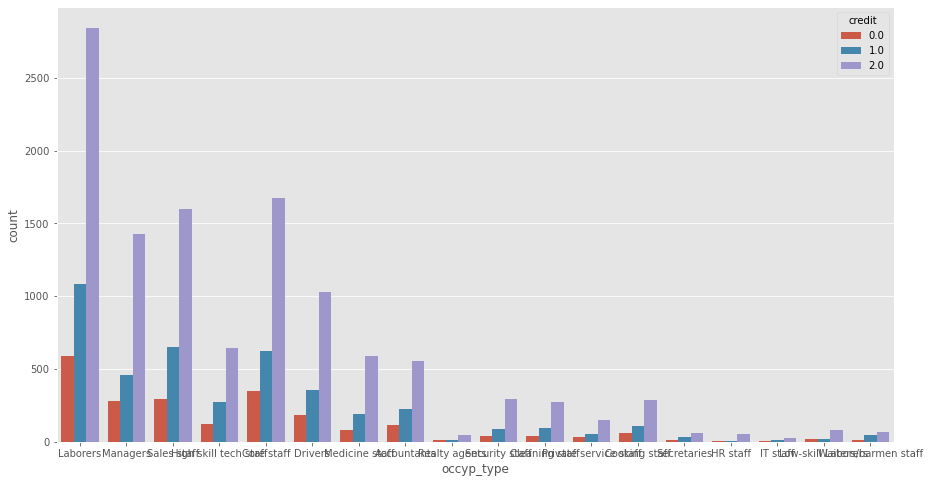

In [211]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'occyp_type',
              data = trn,
             hue = 'credit')

<AxesSubplot:xlabel='occyp_type,edu_type'>

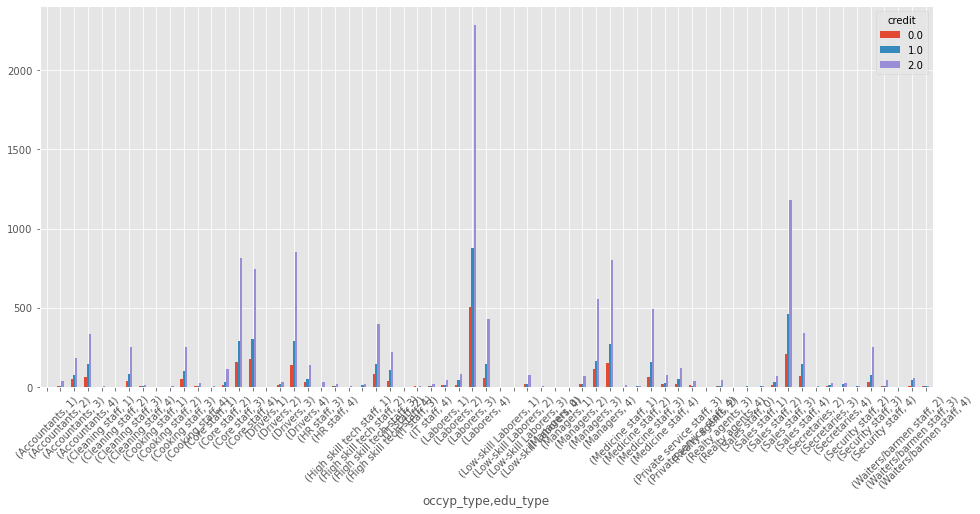

In [214]:
tab = pd.crosstab(index = [trn['occyp_type'], trn['edu_type']], columns = trn.credit)
tab.plot(kind='bar',figsize = (16,7), rot=45)

In [221]:
trn.income_total.describe()

count    2.645700e+04
mean     1.873065e+05
std      1.018784e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.575000e+05
75%      2.250000e+05
max      1.575000e+06
Name: income_total, dtype: float64

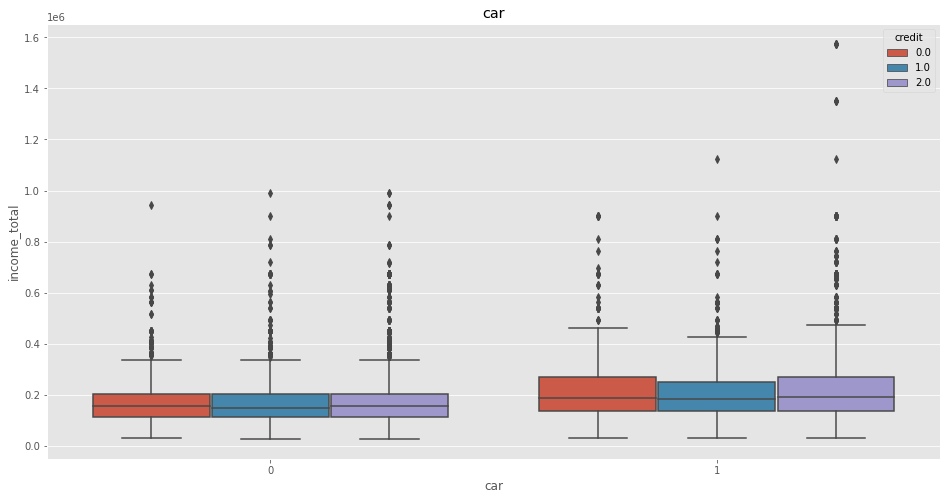

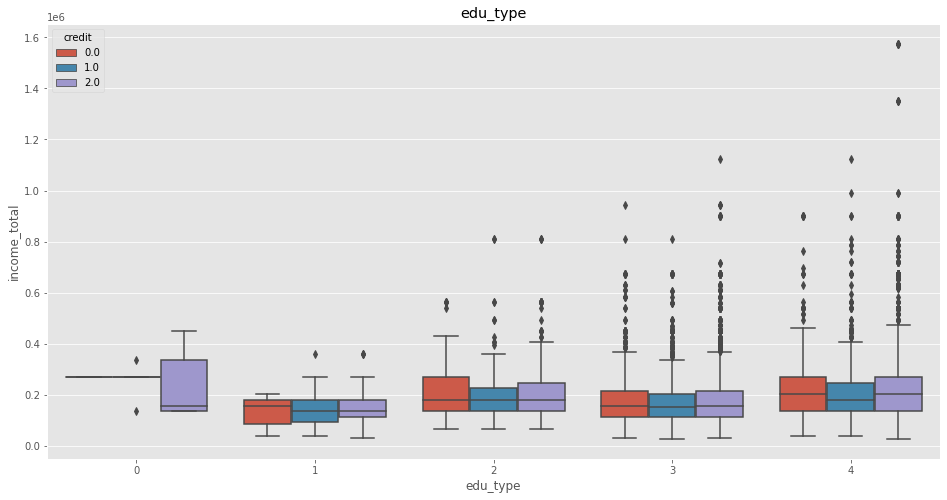

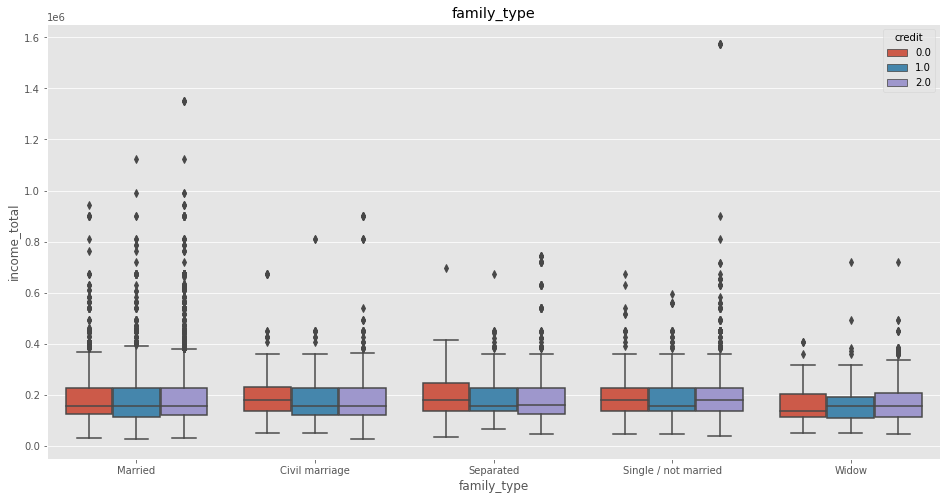

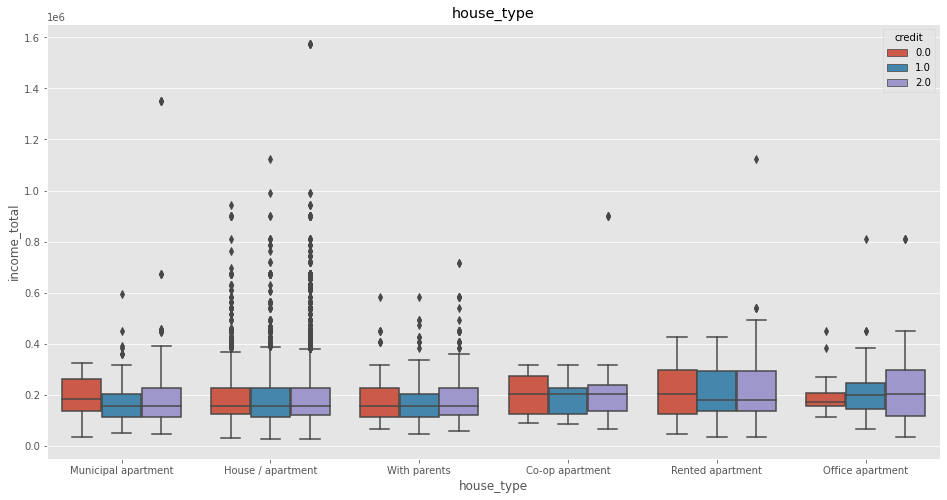

In [239]:
plt.figure(figsize = (16,8))
sns.boxplot(x = 'car', y = 'income_total', hue = 'credit', data = trn)
plt.title('car')
plt.show()

plt.figure(figsize = (16,8))
sns.boxplot(x = 'edu_type', y = 'income_total', hue = 'credit', data = trn)
plt.title('edu_type')
plt.show()

plt.figure(figsize = (16,8))
sns.boxplot(x = 'family_type', y = 'income_total', hue = 'credit', data = trn)
plt.title('family_type')
plt.show()

plt.figure(figsize = (16,8))
sns.boxplot(x = 'house_type', y = 'income_total', hue = 'credit', data = trn)
plt.title('house_type')
plt.show()

In [243]:
trn.begin_month_year

index
0       -1.0
1       -1.0
2       -2.0
3       -4.0
4       -3.0
        ... 
26452   -1.0
26453   -4.0
26454   -3.0
26455   -5.0
26456   -1.0
Name: begin_month_year, Length: 26457, dtype: float64

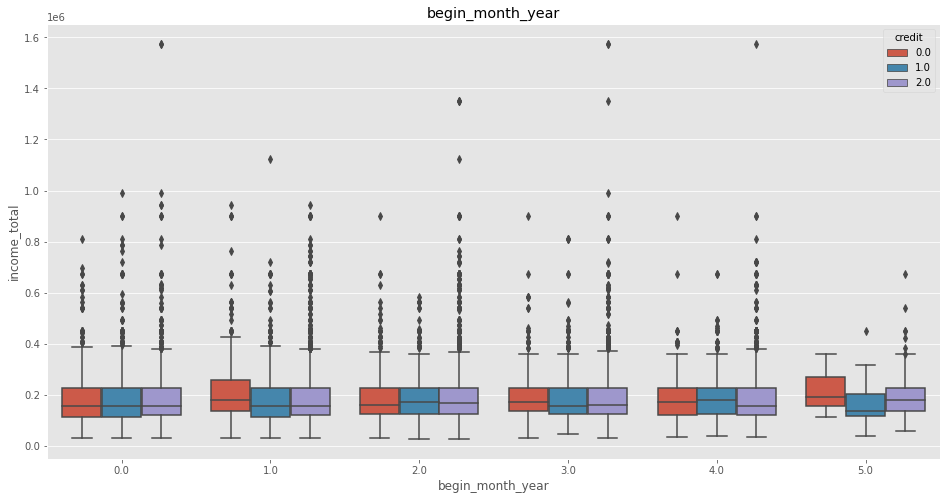

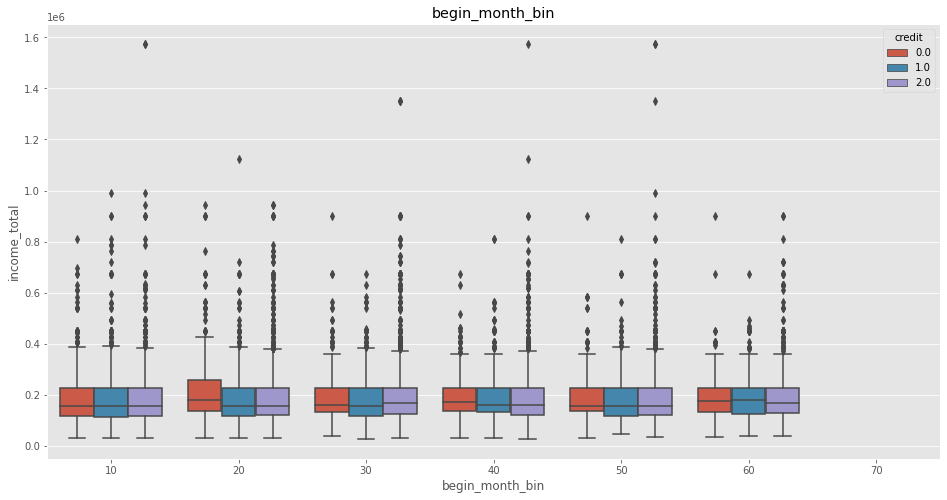

In [250]:
## 신용카드 발급월과 연봉, 그 안의 credit
plt.figure(figsize = (16,8))
sns.boxplot(x = 'begin_month_year', y = 'income_total', hue = 'credit', data = trn)
plt.title('begin_month_year')
plt.show()

plt.figure(figsize = (16,8))
sns.boxplot(x = 'begin_month_bin', y = 'income_total', hue = 'credit', data = trn)
plt.title('begin_month_bin')
plt.show()

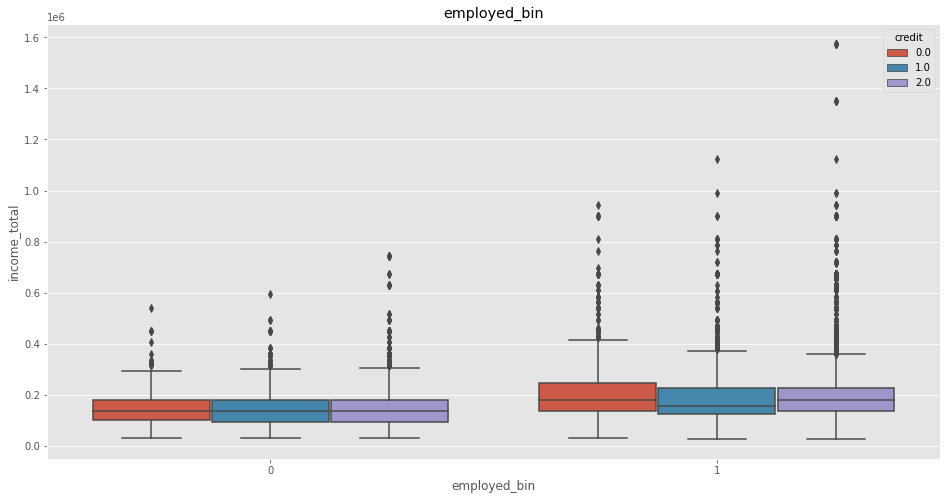

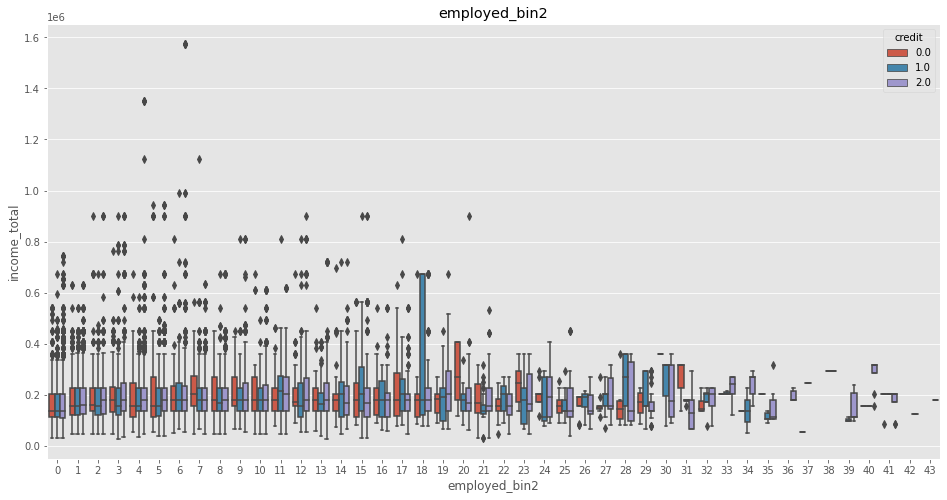

In [241]:
## 업무 시작일과 연봉, 그 안의 credit
plt.figure(figsize = (16,8))
sns.boxplot(x = 'employed_bin', y = 'income_total', hue = 'credit', data = trn)
plt.title('employed_bin')
plt.show()

plt.figure(figsize = (16,8))
sns.boxplot(x = 'employed_bin2', y = 'income_total', hue = 'credit', data = trn)
plt.title('employed_bin2')
plt.show()

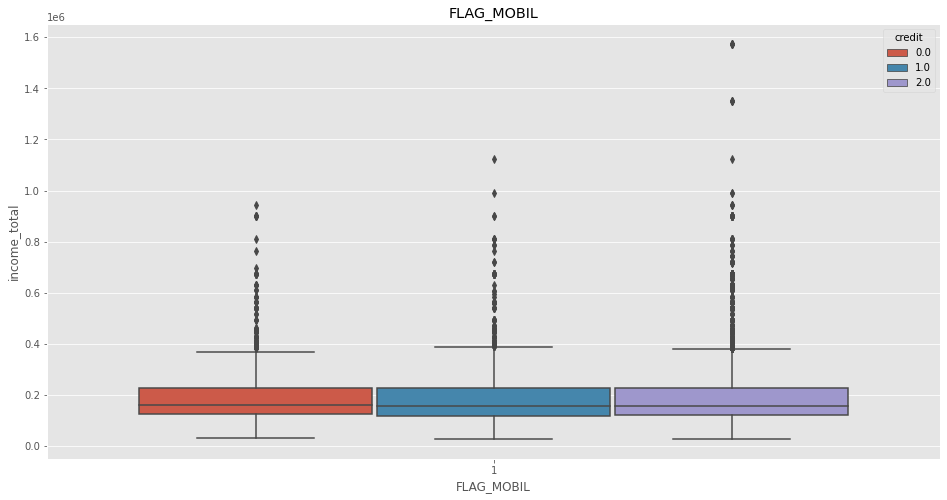

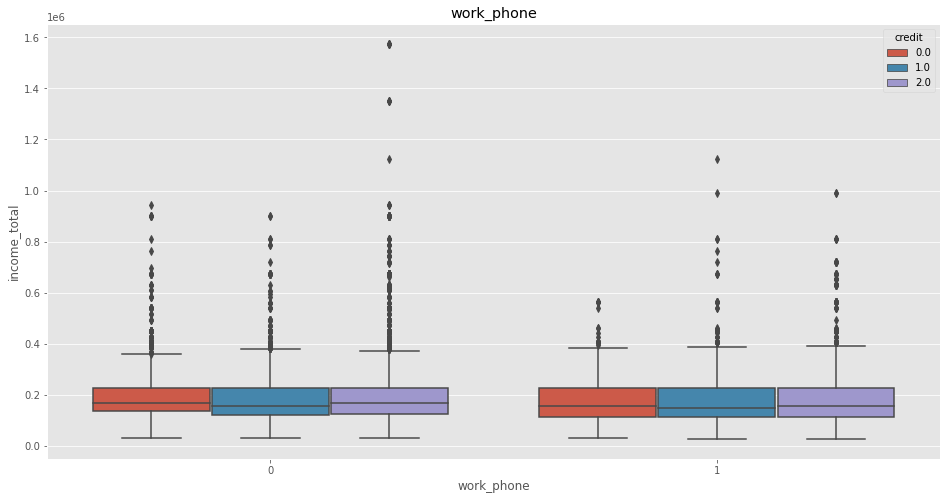

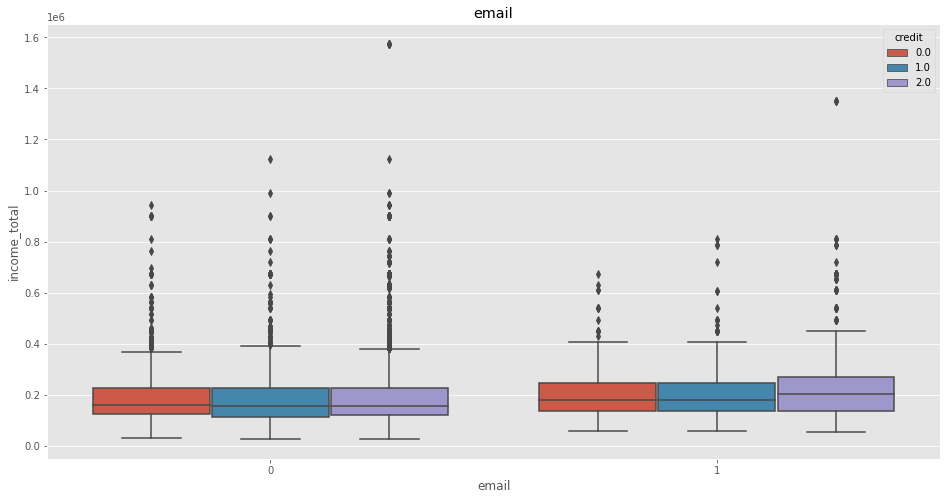

In [279]:
## 핸드폰 소유 여부
plt.figure(figsize = (16,8))
sns.boxplot(x = 'FLAG_MOBIL', y = 'income_total', hue = 'credit', data = trn)
plt.title('FLAG_MOBIL')
plt.show()

## 업무용 전화 소유 여부
plt.figure(figsize = (16,8))
sns.boxplot(x = 'work_phone', y = 'income_total', hue = 'credit', data = trn)
plt.title('work_phone')
plt.show()

## 이메일 소유 여부
plt.figure(figsize = (16,8))
sns.boxplot(x = 'email', y = 'income_total', hue = 'credit', data = trn)
plt.title('email')
plt.show()

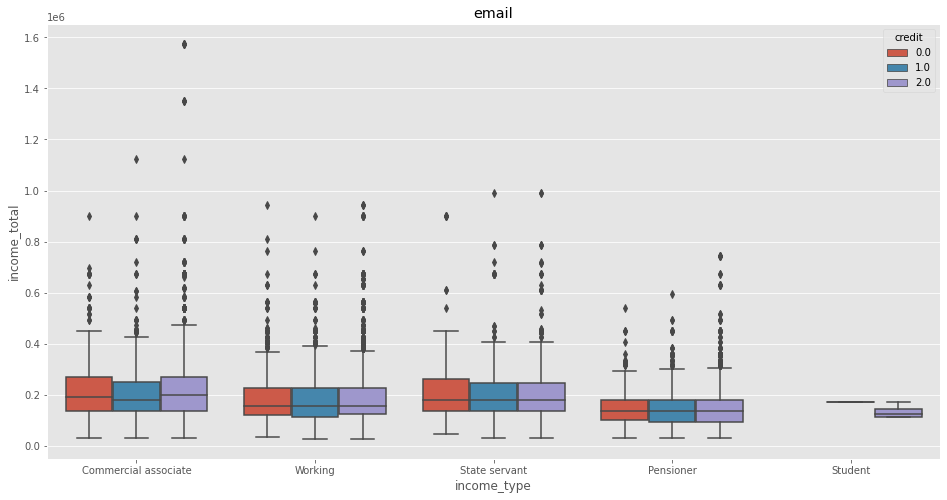

In [280]:
## 소득분류
plt.figure(figsize = (16,8))
sns.boxplot(x = 'income_type', y = 'income_total', hue = 'credit', data = trn)
plt.title('email')
plt.show()

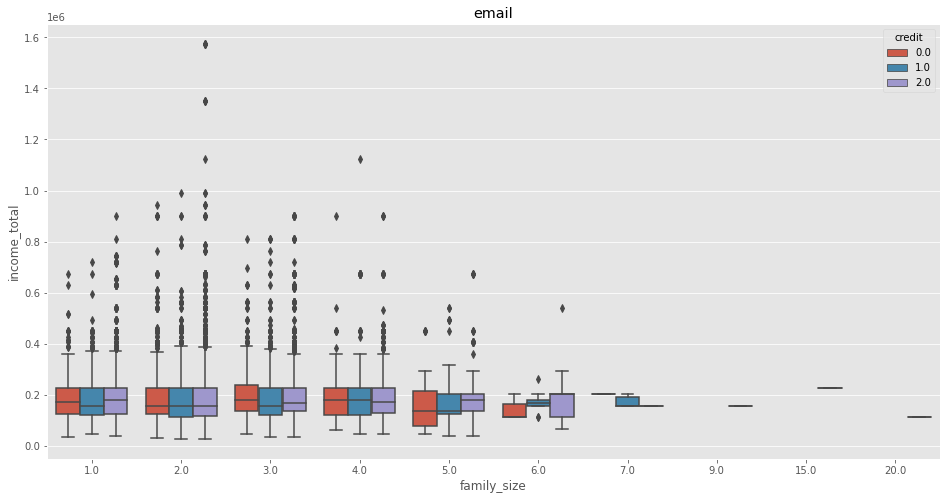

In [288]:
## 가족규모
plt.figure(figsize = (16,8))
sns.boxplot(x = 'family_size', y = 'income_total', hue = 'credit', data = trn)
plt.title('email')
plt.show()

# 가족규모 그룹화

In [306]:
trn[(trn['family_size']==2) & (trn['employed_bin2']>20)]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,begin_month_plus,begin_month_year,begin_month_bin,employed_plus,employed_bin,employed_bin2,birth_employed,birth_begin_day,employed_begin_month,num
index,,,,,,,,,,,,,,,,,,,,,
56,0,1,1,0,130500.0,Working,3,Married,House / apartment,-16137,...,29.0,2.0,30,9391,1,25,6746,15789.0,9043.0,1
90,0,0,1,0,45000.0,State servant,3,Married,House / apartment,-20200,...,30.0,2.0,30,9404,1,25,10796,19840.0,9044.0,1
100,0,0,1,0,135000.0,Working,4,Married,House / apartment,-22112,...,9.0,0.0,10,8491,1,23,13621,22004.0,8383.0,1
121,0,0,0,0,144000.0,Working,3,Married,Municipal apartment,-16641,...,35.0,2.0,40,9988,1,27,6653,16221.0,9568.0,1
145,0,1,0,0,202500.0,State servant,3,Married,House / apartment,-19598,...,7.0,0.0,10,11940,1,32,7658,19514.0,11856.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26311,0,0,0,0,144000.0,Working,3,Married,Municipal apartment,-16641,...,37.0,3.0,40,9988,1,27,6653,16197.0,9544.0,1
26322,0,0,1,1,135000.0,Working,3,Single / not married,Municipal apartment,-16767,...,39.0,3.0,40,9270,1,25,7497,16299.0,8802.0,1
26342,0,0,0,0,90000.0,Working,3,Married,House / apartment,-18728,...,11.0,0.0,20,9325,1,25,9403,18596.0,9193.0,1


In [308]:
trn[(trn['family_size']==2) & (trn['employed_bin2']>20)].groupby(['employed_bin2','credit'])['credit'].count()

employed_bin2  credit
21             0.0       14
               1.0       28
               2.0       56
22             0.0       11
               1.0       20
               2.0       56
23             0.0        6
               1.0       14
               2.0       58
24             0.0        2
               1.0        5
               2.0       32
25             0.0        7
               1.0       14
               2.0       52
26             0.0        5
               1.0        5
               2.0       31
27             0.0       13
               1.0       11
               2.0       29
28             0.0        6
               1.0        3
               2.0       25
29             0.0        3
               1.0       14
               2.0       34
30             1.0        3
               2.0       17
31             0.0        3
               2.0       21
32             0.0        2
               1.0        2
               2.0       21
33             1.0        

In [301]:
trn[(trn['family_size']==2) & (trn['employed_bin2']>20)]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,begin_month_plus,begin_month_year,begin_month_bin,employed_plus,employed_bin,employed_bin2,birth_employed,birth_begin_day,employed_begin_month,num
index,,,,,,,,,,,,,,,,,,,,,
56,0,1,1,0,130500.0,Working,3,Married,House / apartment,-16137,...,29.0,2.0,30,9391,1,25,6746,15789.0,9043.0,1
90,0,0,1,0,45000.0,State servant,3,Married,House / apartment,-20200,...,30.0,2.0,30,9404,1,25,10796,19840.0,9044.0,1
100,0,0,1,0,135000.0,Working,4,Married,House / apartment,-22112,...,9.0,0.0,10,8491,1,23,13621,22004.0,8383.0,1
121,0,0,0,0,144000.0,Working,3,Married,Municipal apartment,-16641,...,35.0,2.0,40,9988,1,27,6653,16221.0,9568.0,1
145,0,1,0,0,202500.0,State servant,3,Married,House / apartment,-19598,...,7.0,0.0,10,11940,1,32,7658,19514.0,11856.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26311,0,0,0,0,144000.0,Working,3,Married,Municipal apartment,-16641,...,37.0,3.0,40,9988,1,27,6653,16197.0,9544.0,1
26322,0,0,1,1,135000.0,Working,3,Single / not married,Municipal apartment,-16767,...,39.0,3.0,40,9270,1,25,7497,16299.0,8802.0,1
26342,0,0,0,0,90000.0,Working,3,Married,House / apartment,-18728,...,11.0,0.0,20,9325,1,25,9403,18596.0,9193.0,1


In [236]:
## 교육수준이 완전히 낮으면 신용도가 낮다
trn[trn.edu_type == 0]['credit'].value_counts()

2.0    14
1.0     7
0.0     2
Name: credit, dtype: int64

In [262]:
trn.credit.value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

In [261]:
trn[trn.employed_bin2 > 20].groupby(['employed_bin2','credit'])['credit'].count()

employed_bin2  credit
21             0.0       16
               1.0       36
               2.0       81
22             0.0       16
               1.0       33
               2.0       81
23             0.0        9
               1.0       21
               2.0       82
24             0.0       13
               1.0       17
               2.0       53
25             0.0       12
               1.0       23
               2.0       86
26             0.0       15
               1.0        8
               2.0       44
27             0.0       14
               1.0       21
               2.0       43
28             0.0        6
               1.0        4
               2.0       30
29             0.0        4
               1.0       27
               2.0       34
30             0.0        1
               1.0        3
               2.0       21
31             0.0        3
               1.0        4
               2.0       27
32             0.0        4
               1.0        

<AxesSubplot:xlabel='employed_bin2', ylabel='income_total'>

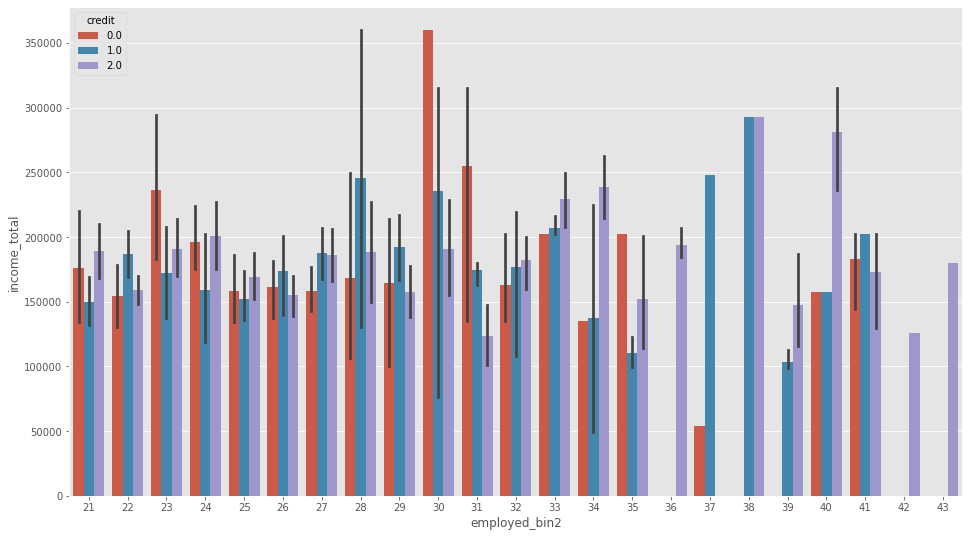

In [276]:
plt.figure(figsize = (16,9))
sns.barplot(data= trn[trn.employed_bin2 > 20],x= "employed_bin2",y= "income_total", hue="credit")

In [278]:
pd.crosstab(index = trn['employed_bin2'], columns = trn.age)

age,30,40,50,60,70
employed_bin2,,,,,
0,539,669,609,2384,2107
1,633,793,660,215,39
2,616,706,458,247,11
3,493,760,568,232,22
4,499,630,576,322,22
5,345,530,387,238,41
6,325,587,391,187,20
7,232,418,298,176,15
8,213,466,462,178,13


In [282]:
trn['num'] = 1

<AxesSubplot:xlabel='income_type,occyp_type'>

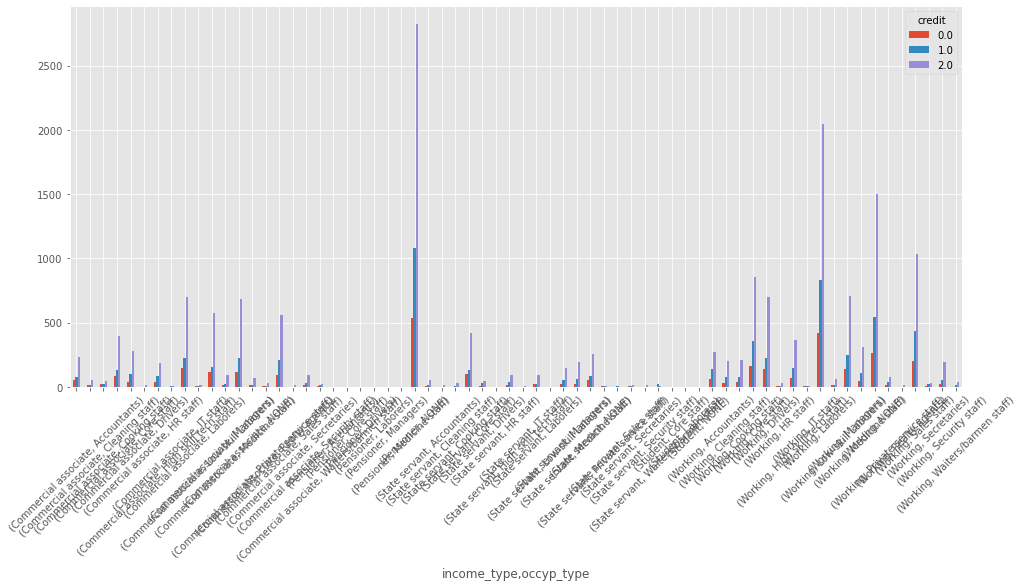

In [287]:
tab = pd.crosstab(index = [trn['income_type'], trn['occyp_type']], columns = trn.credit)
tab.plot(kind='bar', stacked=False, figsize = (16,7), rot=45)

<AxesSubplot:xlabel='house_type', ylabel='count'>

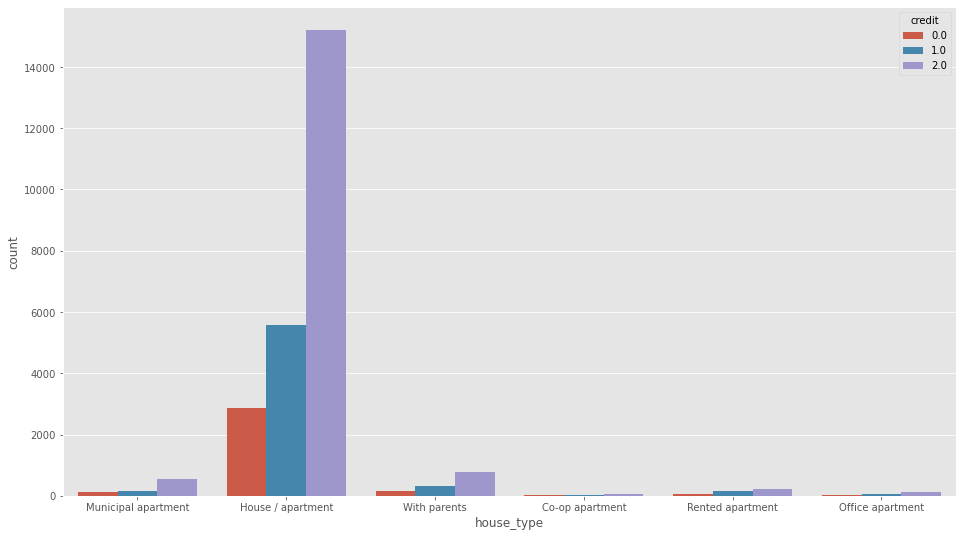

In [312]:
plt.figure(figsize = (16,9))
sns.countplot(x = 'house_type', hue = 'credit', data = trn)

## 연속형 분포 확인 histogram

<AxesSubplot:>

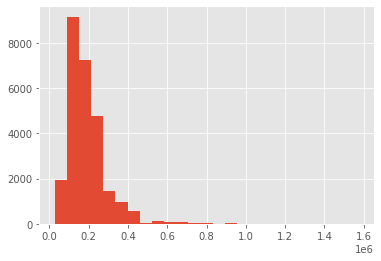

In [27]:
## 히스토그램 그리기
trn['income_total'].hist(bins=25)

## 로그 씌우기 -> 정규분포화
# train['income_total'].apply(np.log).hist(bins=25)

Text(0.5, 1.0, 'y = 2')

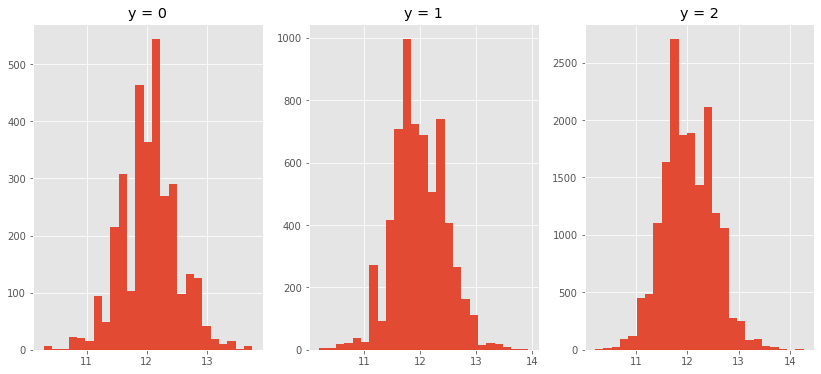

In [26]:
# credit에 따라 소득의 분포가 크게 달라보이지 않음
fig, axes = plt.subplots(1, 3, figsize=(14, 6))
trn['income_total'].apply(np.log)[trn.credit==0].hist(bins=25, ax=axes[0])
trn['income_total'].apply(np.log)[trn.credit==1].hist(bins=25, ax=axes[1])
trn['income_total'].apply(np.log)[trn.credit==2].hist(bins=25, ax=axes[2])

axes[0].set_title('y = 0')
axes[1].set_title('y = 1')
axes[2].set_title('y = 2')

## distplot

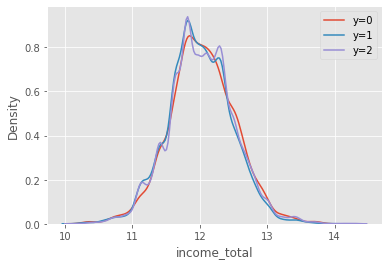

In [25]:
sns.distplot(trn['income_total'].apply(np.log)[trn.credit==0], label='y=0', hist=False)
sns.distplot(trn['income_total'].apply(np.log)[trn.credit==1], label='y=1', hist=False)
sns.distplot(trn['income_total'].apply(np.log)[trn.credit==2], label='y=2', hist=False)
plt.legend()

## Counter

Counter({'F': 17697, 'M': 8760})



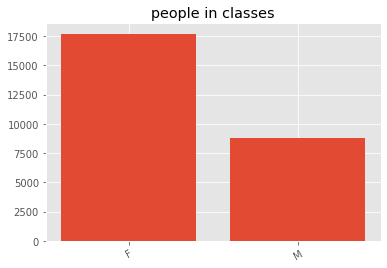

In [33]:
def categorical_show(df, col, y_cols='credit'):
    counter = Counter(df[col])
    print(counter)
    print()
    plt.bar(counter.keys(), counter.values())
    plt.xticks(rotation=30)
    plt.title('people in classes')
    plt.show()
    
categorical_show(trn, 'gender')

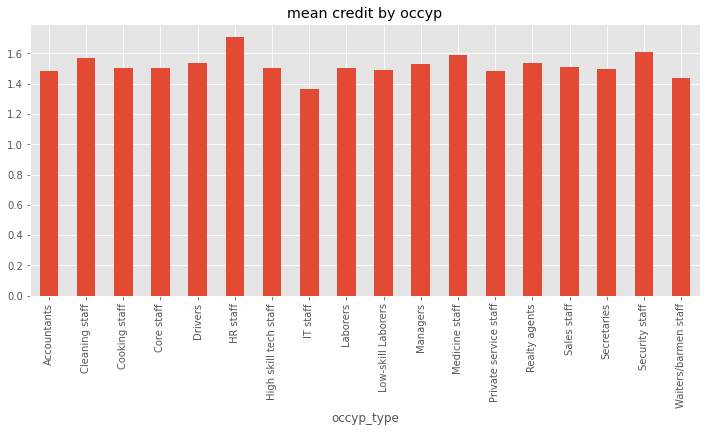

In [35]:
## 범주형 변수의 카테고리별 평균 그래프로 확인
plt.figure(figsize=(12, 5))
trn.groupby('occyp_type').credit.mean().plot.bar()
plt.title('mean credit by occyp')
plt.show()

<AxesSubplot:xlabel='gender,car,credit'>

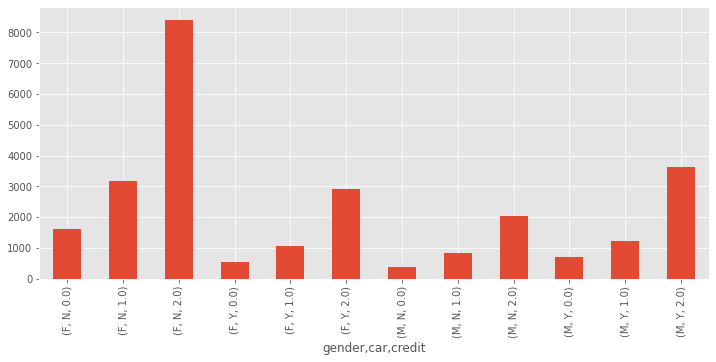

In [44]:
plt.figure(figsize = (12,5))
trn.groupby(['gender','car','credit'])['credit'].count().plot.bar()

In [45]:
## GROUPBY - 2 : 세개의 변수를 묶어서 변환
trn['gender_car_reality'] = (
                                                trn.gender.astype(str)
                                                +'_'
                                                + trn.car.astype(str)
                                                +'_'
                                                +trn.reality.astype(str)
)

## 데이터프레임을 테이블 형식으로 표현
display(trn['gender_car_reality'].head())
display(trn.groupby(['gender_car_reality'])['index'].count().reset_index(name = 'count').sort_values(by='count'))

0    F_N_N
1    F_N_Y
2    M_Y_Y
3    F_N_Y
4    F_Y_Y
Name: gender_car_reality, dtype: object

,gender_car_reality,count
4,M_N_N,1231
2,F_Y_N,1465
6,M_Y_N,1911
5,M_N_Y,2013
3,F_Y_Y,3066
7,M_Y_Y,3605
0,F_N_N,4020
1,F_N_Y,9146


<AxesSubplot:xlabel='gender_car_reality,credit'>

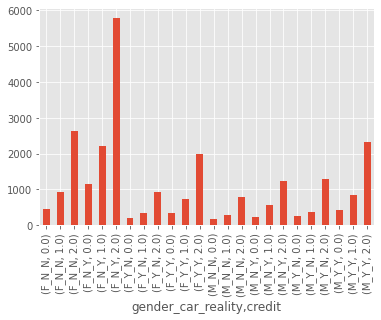

In [52]:
trn.groupby(['gender_car_reality','credit'])['credit'].count().plot.bar()

In [ ]:
# 1-1 )  Mapping ENCODING
print('edu_type 종류 : ',list(train.edu_type.unique()))
display(train[['edu_type']].head())
edu_order = {
    'Lower secondary' : 0, # 중학교 미만
    'Secondary / secondary special' : 1, #중학교
    'Incomplete higher' : 2, # 고등학교 중퇴
    'Higher education' : 3, # 고등학교 졸업
     'Academic degree' : 4 # 학사 이상
}
train.edu_type = train.edu_type.map(edu_order)
display(train[['edu_type']].head())